In [2]:
import numpy
import sys
import numpy as np                                      # ndarrys for gridded data
import pandas as pd                                     # DataFrames for tabular data
import os                                               # set working directory, run executables
import matplotlib.pyplot as plt                         # for plotting
from matplotlib.colors import ListedColormap            # custom color maps
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                 # summary statistics
import math                                             # trigonometry etc.
import scipy.signal as signal                           # kernel for moving window calculation
import random                                           # for randon numbers
import seaborn as sns                                   # for matrix scatter plots
from scipy import linalg                                # for linear regression
from sklearn import preprocessing                       # remove encoding error
from sklearn.feature_selection import RFE               # for recursive feature selection
from sklearn.feature_selection import mutual_info_regression # mutual information
from sklearn.linear_model import LinearRegression       # linear regression model
from sklearn.ensemble import RandomForestRegressor      # model-based feature importance
from statsmodels.stats.outliers_influence import variance_inflation_factor # variance inflation factor
plt.rc('axes', axisbelow=True)                          # girds and axes behind all plot elements
cmap = plt.cm.inferno    

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
daily_data =pd.read_csv("/content/drive/MyDrive/Hackathon2023/dailyData.csv")

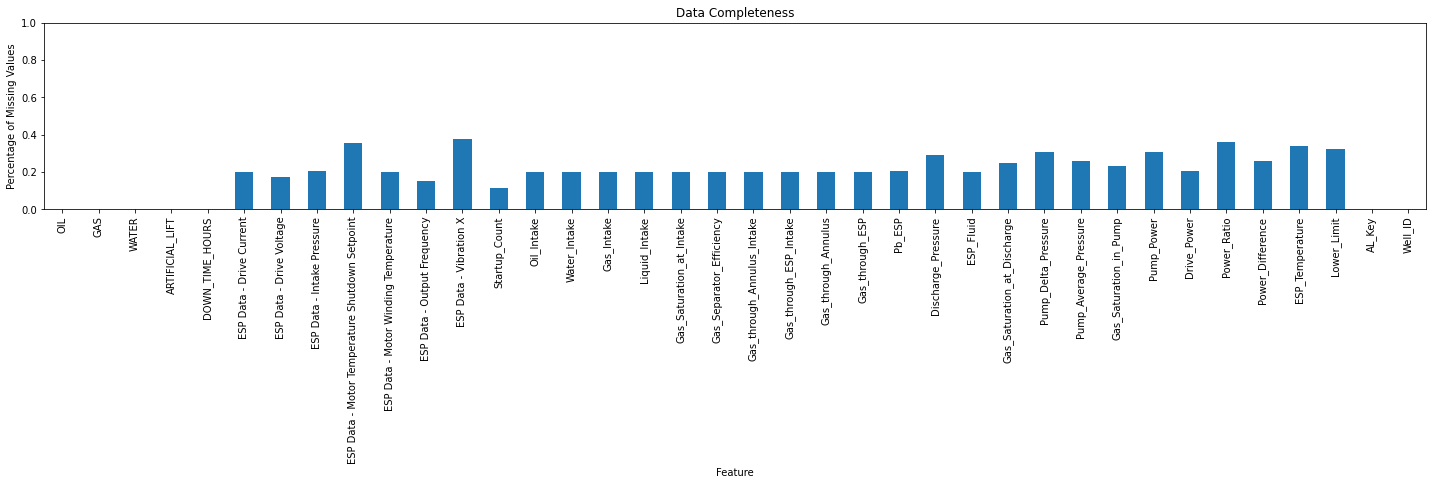

In [5]:
plt.subplot(311)
(daily_data.isnull().sum()/len(daily_data)).plot(kind = 'bar')          # calculate DataFrame with percentage missing by feature
plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Values'); plt.title('Data Completeness'); plt.ylim([0.0,1.0])

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=2.2, wspace=0.2, hspace=0.2) # plot formatting
plt.show()

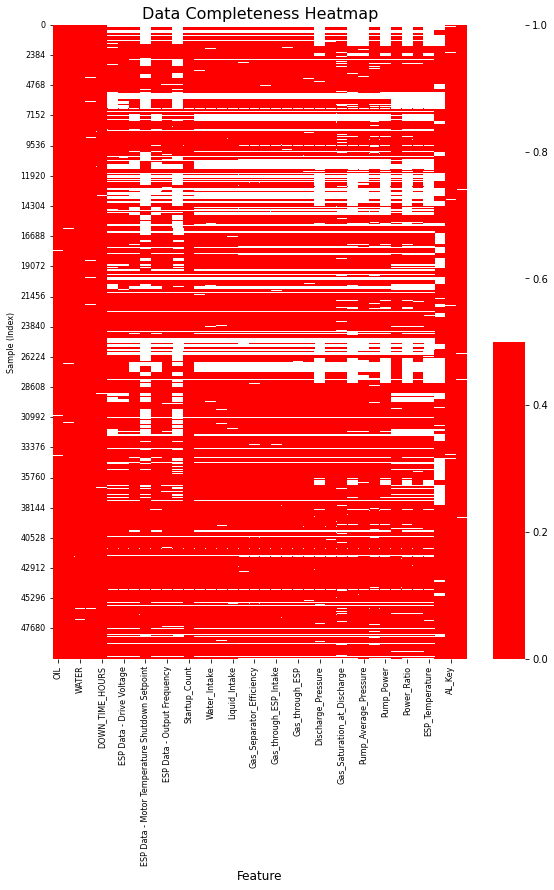

In [6]:
add_missing_data = True
if add_missing_data == True:                           # randomly remove data
    prop_missing = 0.005
    daily_data = daily_data.mask(np.random.random(daily_data.shape)<prop_missing)


df_temp = daily_data.copy(deep=True)                            # make a deep copy of the DataFrame
df_bool = df_temp.isnull()                              # true is value, false if NaN
heat = sns.heatmap(df_bool, cmap=['r','w'], annot=False, fmt='.0f') # make the binary heat map, no bins
heat.set_xticklabels(heat.get_xticklabels(), rotation=90, fontsize=8)
heat.set_yticklabels(heat.get_yticklabels(), rotation=0, fontsize=8)
 
heat.set_title('Data Completeness Heatmap',fontsize=16); heat.set_xlabel('Feature',fontsize=12); heat.set_ylabel('Sample (Index)',fontsize=8)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=2.2, wspace=0.2, hspace=0.2) # plot formatting
plt.show()